In [1]:
#|hide
## Standard libraries
import os
import math
import numpy as np
import time
from fastcore.all import *
from nbdev.showdoc import *

# Configure environment
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE']='false' # Tells Jax not to hog all of the memory to this process.

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.auto import tqdm, trange

## project specifics
import diffusion_curvature
import pygsp
import jax
import jax.numpy as jnp
jax.devices()

from diffusion_curvature.graphs import *
from diffusion_curvature.datasets import *
from diffusion_curvature.core import *
from diffusion_curvature.utils import *
from diffusion_curvature.comparison_space import *


%load_ext autoreload
%autoreload 2

# Are Planes Flat?
> A Sanity Check too long delayed

**Hypothesis**: Planes, of any dimension, should have zero curvature with very low variance.

# With Fixed Flattening Diffusion Curvature

In [2]:
dim = 2
num_planes = 100
PlaneGang = [plane(2000,2) for i in range(100)]

In [11]:
graph_former = partial(get_adaptive_graph, k=5, alpha=1)
DC = DiffusionCurvature(
        laziness_method="Entropic",
        flattening_method="Fixed",
        comparison_method="Subtraction",
        graph_former=graph_former,
        points_per_cluster=None,  # construct separate comparison spaces around each point
        comparison_space_size_factor=1,
    )

In [12]:
single_plane_ks = DC.curvature(graph_former(PlaneGang[0]), dim=2, t=25)

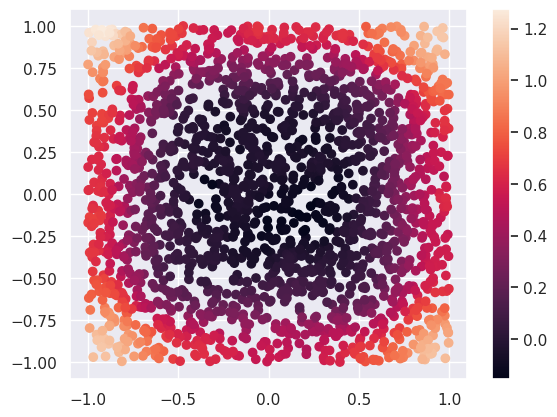

In [13]:
plt.scatter(PlaneGang[0][:,0], PlaneGang[0][:,1], c=single_plane_ks)
plt.colorbar()

# Results

# Conclusion